   Hours_Studied  Review_Session  Results
0       3.745401               0        0
1       9.507143               1        1
2       7.319939               0        1
3       5.986585               0        1
4       1.560186               1        1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours_Studied   100 non-null    float64
 1   Review_Session  100 non-null    int64  
 2   Results         100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB
None


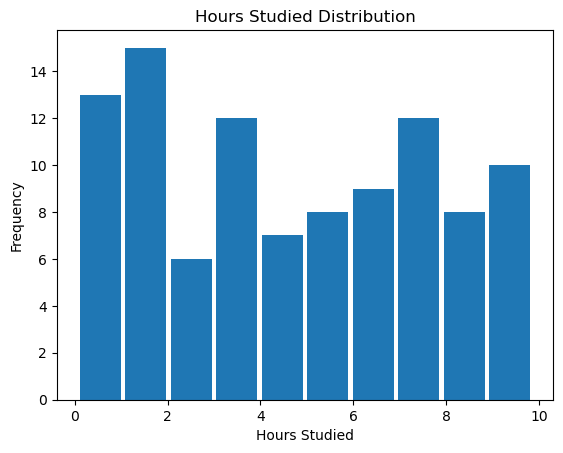

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('student_data.csv')

# Explore the data
print(data.head())
print(data.info())

# Visualize data
data['Hours_Studied'].plot(kind='hist', bins=10, rwidth=0.9)
plt.xlabel('Hours Studied')
plt.title('Hours Studied Distribution')
plt.show()


In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('student_data.csv')

# Define your features (X) and target (y)
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Predict on the same data (not recommended for evaluation)
y_pred = model.predict(X)

# Evaluate the model (not recommended for a final evaluation)
accuracy = accuracy_score(y, y_pred)
report = classification_report(y, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Classification Report:\n", report)


Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        32
           1       0.97      0.93      0.95        68

    accuracy                           0.93       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.93      0.93      0.93       100



Model Coefficients:
[[1.40365599 1.42846816]]
Accuracy: 0.85
AUC: 0.96


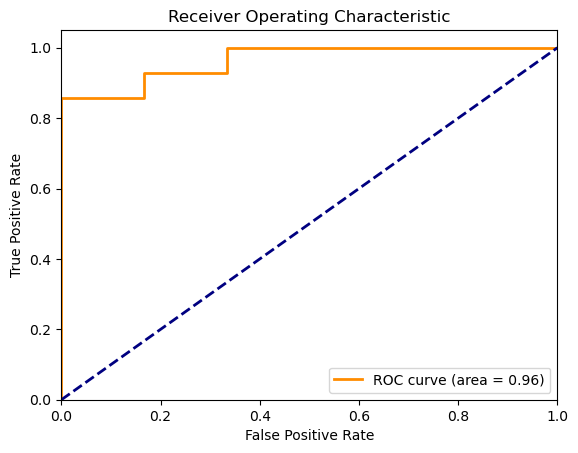

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

data = pd.read_csv('student_data.csv')

# Define the features and target variable
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Split the data into a training and testing set (you can choose the ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Get predicted probabilities for calculating ROC/AUC
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Model coefficients
coefficients = model.coef_

# Output metrics
print("Model Coefficients:")
print(coefficients)

print(f"Accuracy: {accuracy:.2f}")
print(f"AUC: {roc_auc:.2f}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
